# Final Evaluation

---

## Problem-I: Multiple Linear Regression

Perform **Multiple Linear Regression** to create a machine learning model using fuel consumption dataset **`VehicleFuelCO2.csv`**, which contains fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
* Use scikit-learn to implement Multiple Linear Regression.
* Create a model, train it, test it and use the model to **answer a few questions**.

The model is to predict **CO2 EMISSIONS** of new vehicles using **all the three available features** in the dataset:


- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


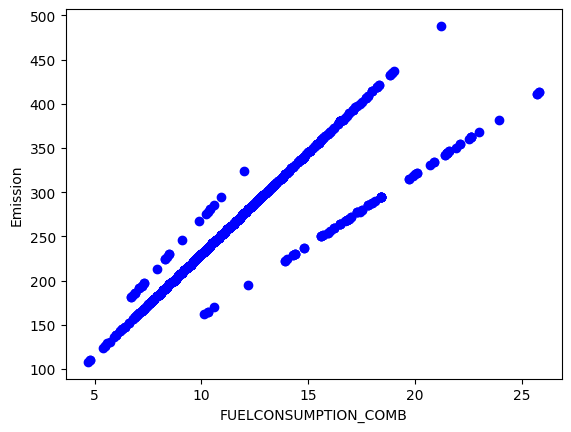

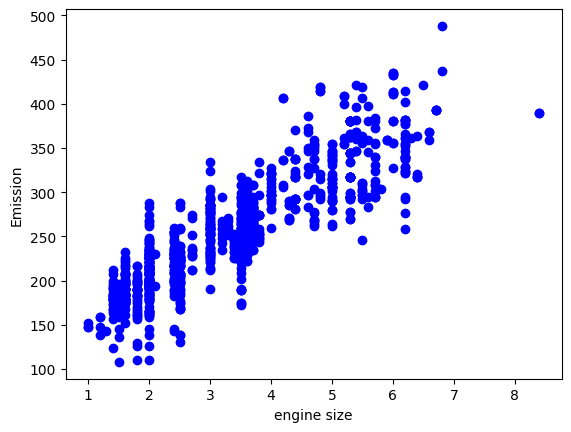

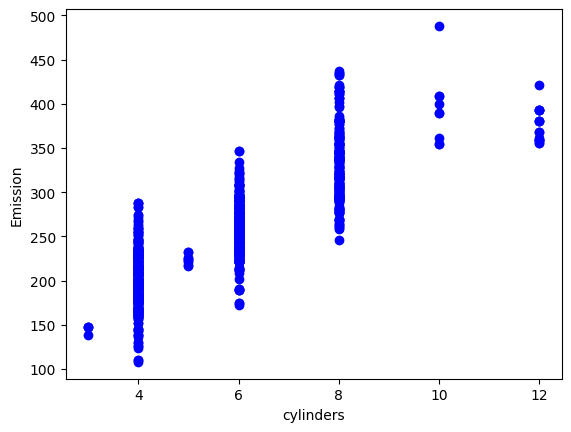

Train set: (853, 3) (853, 1)
Test set: (214, 3) (214, 1)


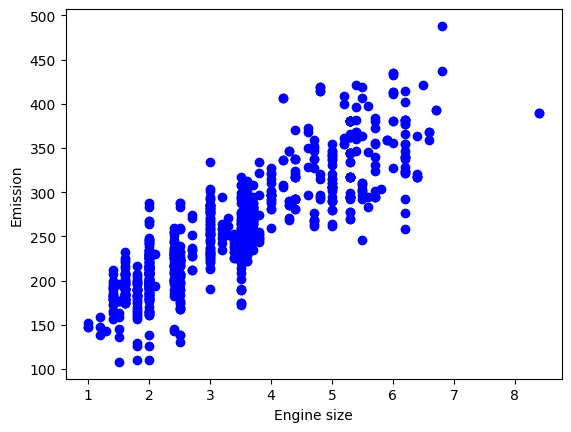

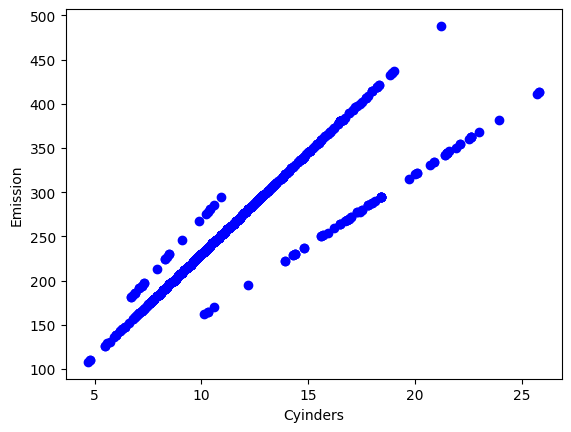

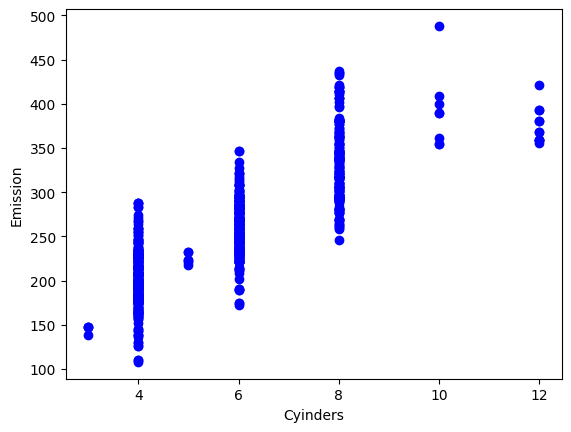

Intercept:  [65.2578757]
Coefficients:  [[10.24537129  9.68132732  7.64355532]]

Mean absolute error: 14.50
Mean Squared Error (MSE) : 408.38
R2-score: 0.89


In [4]:
# Start Problem-I code here

# Importing needed packages/libraries first
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#Importing Dataset

from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv('/content/drive/MyDrive/VehicleFuelCO2.csv')
df.head()


#checking to see if relation is linear for all the features

plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()


plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel("engine size")
plt.ylabel("Emission")
plt.show()


plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='blue')
plt.xlabel("cylinders")
plt.ylabel("Emission")
plt.show()


# making a train-test split
# we add multiple X features for multiple regression
X = df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']].values
y = df[['CO2EMISSIONS']].values

from sklearn.model_selection import train_test_split

trn_X, tst_X, trn_y, tst_y = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', trn_X.shape,  trn_y.shape)
print ('Test set:', tst_X.shape,  tst_y.shape)

#looking at the data distribution
plt.scatter(trn_X[:, 0], trn_y[:],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(trn_X[:, 1], trn_y[:],  color='blue')
plt.xlabel("Cyinders")
plt.ylabel("Emission")
plt.show()

plt.scatter(trn_X[:, 2], trn_y[:],  color='blue')
plt.xlabel("Cyinders")
plt.ylabel("Emission")
plt.show()

#training the model
from sklearn import linear_model

regr2 = linear_model.LinearRegression()

regr2.fit(trn_X, trn_y)

# The Intercept and coefficients
print ('Intercept: ',regr2.intercept_)
print ('Coefficients: ', regr2.coef_)


#making predictions
from sklearn.metrics import r2_score

y_hat= regr2.predict(tst_X)

print("\nMean absolute error: %.2f" % np.mean(np.absolute(y_hat - tst_y)))
print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - tst_y) ** 2))
print("R2-score: %.2f" % r2_score(tst_y , y_hat) )


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Questions**:

What are the evaluation values of **Mean absolute error**, **Mean Squared Error (MSE)**, and **R2-score** for your model?

**Answer these values in the relevant questions of the attached given Quiz form.**

---

# Problem-II: Deep Learning
Create and train a Machine Learning/Deep Learning model in **TensorFlow** (using its high level **Keras API**).

The model has to convert from Celsius to Fahrenheit, where the approximate (real) formula/equation is:

$$ f = c \times 1.8 + 32 $$

You have to give the TensorFlow model folliwng $10$ Celsius values and their corresponding Fahrenheit values. Then, you have to train a model that figures out (learn) the above formula/equation through the training process.

**celsius_q**:  $[32, 45, 69, 38, 40, 14, 34, 81, 8, 90]$

**fahrenheit_a**:  $[89.6, 113.0, 156.2, 100.4, 104.0 , 57.2, 93.2, 177.8, 46.4, 194.0]$



### Create the model
Use a simple model with a network having single Dense layer with single neuron.

#### Build the layer

Call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]`

*   `units=1` — This specifies the number of neurons in the layer to be one.

The following code lines are used:

`l0 = tf.keras.layers.Dense(units=1, input_shape=[1])`

[32. 45. 69. 38. 40. 14. 34. 81.  8. 90.]
[ 89.6 113.  156.2 100.4 104.   57.2  93.2 177.8  46.4 194. ]
32.0 degrees Celsius = 89.6 degrees Fahrenheit
45.0 degrees Celsius = 113.0 degrees Fahrenheit
69.0 degrees Celsius = 156.2 degrees Fahrenheit
38.0 degrees Celsius = 100.4 degrees Fahrenheit
40.0 degrees Celsius = 104.0 degrees Fahrenheit
14.0 degrees Celsius = 57.2 degrees Fahrenheit
34.0 degrees Celsius = 93.2 degrees Fahrenheit
81.0 degrees Celsius = 177.8 degrees Fahrenheit
8.0 degrees Celsius = 46.4 degrees Fahrenheit
90.0 degrees Celsius = 194.0 degrees Fahrenheit


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


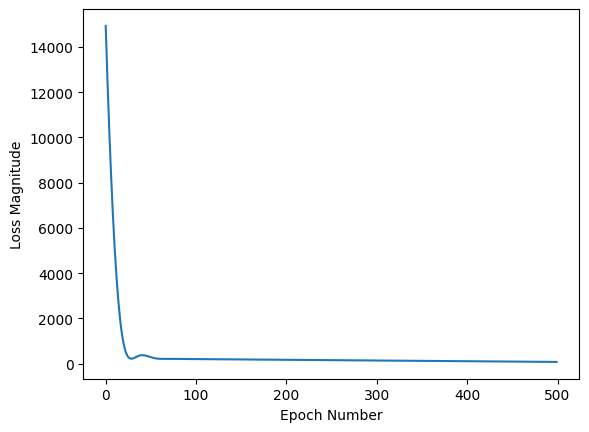

In [6]:
# Problem-II Code starts here

import tensorflow as tf
import numpy as np

celsius_q = np.array([32, 45, 69, 38, 40, 14, 34, 81, 8, 90],  dtype=float)
fahrenheit_a = np.array([89.6, 113.0, 156.2, 100.4, 104.0, 57.2, 93.2, 177.8, 46.4, 194.0],  dtype=float)

print(celsius_q)
print(fahrenheit_a)

#visualize the data

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

#  making one layer with a single neuron
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([l0])

# adding a loss function with compilation with 0.1 learning rate

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))


#training the model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)



# visualising results

import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])




### Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

In [8]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[223.78333]]


To compare: the real value is $51 \times 1.8 + 32 = 123.8$ and $212$ for $100$.

**Questions**:

If the Celsius value is $51$ and $100$, what are the predicted Fahrenheit results using your trained model?

**Answer these values in the relevant question of the attached given Quiz form.**

---